# 01 - Data Cleaning & Pre-Processing

In [140]:
import pandas as pd
import matplotlib.pyplot as plt


In [141]:
# Source (via wine.com) : https://www.kaggle.com/datasets/salohiddindev/wine-dataset-scraping-from-wine-com  (prices in USD)
df_wine_com = pd.read_csv("./data/original_datasets/wine_com.csv", encoding='utf-16')

# Source (via Vivino.com): https://www.kaggle.com/datasets/budnyak/wine-rating-and-price (prices in EUR)
df_viv_1 = pd.read_csv('./data/original_datasets/vivino_one.csv')
df_viv_1.drop(columns=['Unnamed: 0'], inplace=True)

# Source (via Vivino.com): https://www.kaggle.com/datasets/joshuakalobbowles/vivino-wine-data (prices in EUR)
df_viv_2 = pd.read_csv('./data/original_datasets/vivino_two.csv')

# Source (via Vivino.com): https://www.kaggle.com/datasets/joshuakalobbowles/vivino-wine-data (prices in EUR)
df_val = pd.read_csv('./data/original_datasets/validation_set.csv')

In [142]:
# make columns snake_case 
df_viv_1.columns = [col.lower().replace(' ', '_') for col in df_viv_1.columns]
df_viv_2.columns = [col.lower().replace(' ', '_') for col in df_viv_2.columns]
df_wine_com.columns = [col.lower().replace(' %', '').replace(' ', '_') for col in df_wine_com.columns]
df_val.columns = [col.lower().replace(' ', '_') for col in df_val.columns]

# Cleaning wine.com Dataset

In [143]:
df_wine_com.head()

,names,color_wine,prices,ml,ratings,ratingsnum,countrys,abv,rates
0,00 Wines VGW Chardonnay 2017,White Wine,79.99$,750,0.0,0,"Chardonnay from Willamette Valley, Oregon",13.0,"JS, WE, WS"
1,00 Wines VGR Pinot Noir 2019,Red Wine,99.99$,750,0.0,0,"Pinot Noir from Willamette Valley, Oregon",12.9,"WE, JS, RP"
2,00 Wines EGW Chardonnay 2019,White Wine,115.99$,750,0.0,0,"Chardonnay from Willamette Valley, Oregon",0.0,"JS, RP, WE"
3,100 Nails Ranch Pinot Noir 2019,Red Wine,16.99$,750,0.0,0,"Pinot Noir from Central Coast, California",14.2,WW
4,100 Nails Ranch Chardonnay 2019,White Wine,16.99$,750,0.0,0,"Chardonnay from Sonoma County, California",14.2,0


In [144]:
df_wine_com.shape

(15254, 9)

In [145]:
df_wine_com.dtypes

names          object
color_wine     object
prices         object
ml              int64
ratings       float64
ratingsnum      int64
countrys       object
abv           float64
rates          object
dtype: object

In [146]:
# correct prices 
df_wine_com['prices'] = df_wine_com['prices'].str.replace(',', '').str.replace('$', '').astype(float)


In [147]:
# extract column for vintage from name
def get_vintage(x):
    try: 
        if int(x[-4:]) in range(1800, 2025):
            return str(x[-4:])
    except ValueError:
        return 'unknown'

df_wine_com['vintage'] = df_wine_com['names'].apply(get_vintage)
print(df_wine_com['vintage'].value_counts())

vintage
2019       3050
2020       2873
2018       2317
2021       1788
2017       1373
unknown    1089
2016        781
2015        437
2014        260
2013        163
2012        153
2010        116
2009         98
2011         85
2005         72
2008         68
2007         52
2002         50
2006         50
2001         44
2004         41
2000         41
2003         36
1999         34
1995         31
1996         27
1998         27
1997         18
2022         14
1994         14
1993          8
1989          6
1990          6
1991          4
1985          4
1983          3
1988          3
1928          2
1976          1
1968          1
1912          1
1973          1
1937          1
1977          1
1972          1
1969          1
1927          1
1954          1
1971          1
1978          1
1827          1
1975          1
1984          1
Name: count, dtype: int64


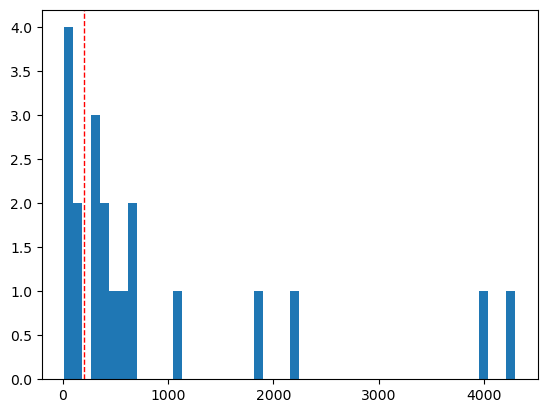

In [148]:
# investigate very old wines
old_wines = df_wine_com[df_wine_com['vintage'] < '1985']
plt.hist(old_wines['prices'], bins=50)
plt.axvline(x=200, color='r', linestyle='dashed', linewidth=1, label='$200');

In [149]:
'''
remove vintage for wines below $200 in price and 'older' than 1985
having investgated them individually these are wines with the established year in their name 
as opposed to the actual vintage ( year grape was picked)
'''
df_wine_com.loc[(df_wine_com['prices'] < 200) & (df_wine_com['vintage'] < '1985'), 'vintage'] = 'unknown'

In [150]:
df_wine_com['color_wine'].value_counts()

color_wine
Red Wine                 9608
White Wine               3767
Sparkling & Champagne    1033
Pink and Rosé             429
0                         293
Collectible                60
Screw Cap                  29
Boutique                   19
Green Wine                 14
Great Gift                  2
Name: count, dtype: int64

In [151]:
def get_wine_variety(x):
    try: 
        if 'red' in x.lower(): 
            return 'red'
        elif 'white' in x.lower(): 
            return 'white'
        elif 'ros' in x.lower() or 'pink' in x.lower():
            return 'rose'
        elif 'sparkling'  in x.lower() or 'champagne' in x.lower() or 'prosecco' in x.lower() or 'espumante' in x.lower():
            return 'sparkling'
        else:
            return 'unknown'
    except:
        return 'error parsing' 

df_wine_com['wine_variety'] = df_wine_com['color_wine'].apply(get_wine_variety)


In [152]:
# check changes
df_wine_com.drop(columns=['color_wine'], inplace=True)
df_wine_com['wine_variety'].value_counts()

wine_variety
red          9608
white        3767
sparkling    1033
rose          429
unknown       417
Name: count, dtype: int64

In [153]:
# drop wines with ml not equal to 750 and then drop ml column
df_wine_com = df_wine_com[df_wine_com['ml'] == 750].copy()
df_wine_com.drop(columns=['ml'], inplace=True)

In [154]:
# rename columns 
df_wine_com.rename(columns = {'names' : 'name',
                            'prices' : 'price',
                            'ratings' : 'rating',
                            'ratingsnum': 'rating_qty'}, inplace = True)

In [155]:
# extract region name from country column 
def get_region(country):
    from_index = country.lower().find('from')
    comma_index = country.find(',')
    if from_index!= -1 and comma_index!= -1:
        return country[from_index+5:comma_index]
    elif from_index!= -1:
        return country[from_index+5:]
    else:
        return 'unknown'

df_wine_com['region'] = df_wine_com['countrys'].apply(get_region)

# drop 33 wines were region was not found 
df_wine_com = df_wine_com[df_wine_com['region'] != 'unknown'].copy()


In [156]:
# extract country name from country column 
def get_country(country):
    comma_index = country.find(',')
    if comma_index == -1:
        return 'unknown'
    else:
        return country.split(", ")[-1]
        

df_wine_com['country'] = df_wine_com['countrys'].apply(get_country)
df_wine_com['country'].value_counts()

# drop 33 wines were region was not found 
#df_wine_com = df_wine_com[df_wine_com['region'] != 'unknown'].copy()


country
France          4128
California      2845
Italy           2381
unknown         1363
Spain            926
Australia        433
Argentina        407
Washington       300
Germany          258
Oregon           241
Chile            219
Portugal         219
New Zealand      202
Other U.S.       107
South Africa      99
Austria           74
Greece            62
Canada             2
Name: count, dtype: int64

In [157]:
# investigate the unknowns
df_wine_com[df_wine_com['country'] == 'unknown']

,name,price,rating,rating_qty,countrys,abv,rates,vintage,wine_variety,region,country
6,1000 Stories Bourbon Barrel Aged Prospectors' ...,19.99,0.0,0,Cabernet Sauvignon from California,0.0,WW,2020,red,California,unknown
7,1000 Stories American Barrel Aged Pinot Noir 2020,17.99,0.0,0,Pinot Noir from California,14.5,0,2020,red,California,unknown
8,1000 Stories Bourbon Barrel Aged Zinfandel 2020,18.99,3.8,11,Zinfandel from California,15.5,WW,2020,red,California,unknown
9,1000 Stories Bourbon Barrel Aged Chardonnay 2019,19.99,4.4,10,Chardonnay from California,14.4,TP,2019,white,California,unknown
10,1000 Stories Bourbon Barrel Aged Prospectors' ...,18.99,0.0,0,Cabernet Sauvignon from California,14.9,0,2018,red,California,unknown
...,...,...,...,...,...,...,...,...,...,...,...
15210,Vinos Atlantico Vera Vinho Verde Rose 2021,12.99,0.0,0,Rosé from Portugal,11.5,0,2021,rose,Portugal,unknown
15212,Vinos de Arganza Marques De Montejos Mencia 2020,13.99,0.0,0,Mencia from Spain,13.0,"JS, WW",2020,red,Spain,unknown
15214,Vinos de Arganza Alvarez de Toledo Godello 2021,11.99,4.8,29,Godello from Spain,0.0,WW,2021,white,Spain,unknown
15215,Vinos de Arganza Palacio de Arganza Cabernet S...,13.99,4.8,30,Other Red Blends from Spain,13.0,"JS, WW",2020,red,Spain,unknown


In [158]:
us_states = (
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
    'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
)

df_wine_com.loc[df_wine_com['region'].isin(us_states), 'country'] = 'U.S.'

In [159]:
# all unknown countries are cases where no region was available 
region_problems = df_wine_com[df_wine_com['country'] == 'unknown']
region_problems['region'].value_counts()

region
Israel               115
South Africa         105
Chile                 70
Portugal              70
Spain                 69
France                60
Italy                 55
Argentina             32
Uruguay               23
Austria               23
Greece                23
Australia             20
Lebanon               11
England               10
Slovenia               9
Germany                9
Hungary                8
Croatia                6
Brazil                 5
New Zealand            3
Armenia                3
China                  2
Other                  2
Macedonia (FYROM)      2
Other U.S.             1
Name: count, dtype: int64

In [160]:
# move those regions that are countries to the country column 
df_wine_com.loc[df_wine_com['country'] == 'unknown', 'country'] = df_wine_com.loc[df_wine_com['country'] == 'unknown', 'region']
# make those regions that are countries 'unknown'
df_wine_com.loc[df_wine_com['region'] == df_wine_com['country'], 'region'] = 'unknown'
# combine U.S. and Other U.S.
df_wine_com.loc[df_wine_com['country'] == 'Other U.S.', 'country'] = 'U.S.'
# combine all U.S. and Other U.S.
df_wine_com.loc[df_wine_com['country'] == 'California', 'country'] = 'U.S.'
df_wine_com.loc[df_wine_com['country'] == 'Washington', 'country'] = 'U.S.'
df_wine_com.loc[df_wine_com['country'] == 'Oregon', 'country'] = 'U.S.'
# rename macedonia 
df_wine_com.loc[df_wine_com['country'] == 'Macedonia (FYROM)', 'country'] = 'Macedonia'

df_wine_com['country'].value_counts()

country
France          4188
U.S.            4121
Italy           2436
Spain            995
Australia        453
Argentina        439
Portugal         289
Chile            289
Germany          267
New Zealand      205
South Africa     204
Israel           115
Austria           97
Greece            85
Uruguay           23
Lebanon           11
England           10
Slovenia           9
Hungary            8
Croatia            6
Brazil             5
Armenia            3
China              2
Other              2
Canada             2
Macedonia          2
Name: count, dtype: int64

In [161]:
# attempt two methods of grape_variety extraction and compare them to validate manipulation
# method one from name 
def get_grape_1(x):
    from_index = x.lower().find(' from')
    return x[:from_index]
df_wine_com['grape_variety'] = df_wine_com['countrys'].apply(get_grape_1)

In [162]:
grapes = df_wine_com['grape_variety'].value_counts()
# save list of grapes for use later and comparision between other datasets
grape_list_1 = list(grapes.index)
grape_list_1

['Pinot Noir',
 'Cabernet Sauvignon',
 'Chardonnay',
 'Bordeaux Red Blends',
 'Other Red Blends',
 'Syrah/Shiraz',
 'Rhone Red Blends',
 'Non-Vintage Sparkling Wine',
 'Sangiovese',
 'Sauvignon Blanc',
 'Rosé',
 'Riesling',
 'Nebbiolo',
 'Tempranillo',
 'Other White Blends',
 'Sparkling Rosé',
 'Malbec',
 'Merlot',
 'Vintage Sparkling Wine',
 'Pinot Gris/Grigio',
 'Gamay',
 'Zinfandel',
 'Grenache',
 'Cabernet Franc',
 'Chenin Blanc',
 'Port',
 'Other White Wine',
 'Rhone White Blends',
 'Tuscan Blends',
 'Other Red Wine',
 'Barbera',
 'Bordeaux White Blends',
 'Albarino',
 'Muscat',
 'Gruner Veltliner',
 'Dolcetto',
 'Petite Sirah',
 'Vermentino',
 'Mencia',
 'Montepulciano',
 'Pinot Blanc',
 'Mourvedre',
 'Gewurztraminer',
 'Sherry',
 'Aglianico',
 'Vermouth',
 "Nero d'Avola",
 'Carmenere',
 'Viognier',
 'Nerello Mascalese',
 'Red Sparkling Wine',
 'Godello',
 'Madeira',
 'Carignan',
 'Verdejo',
 'Melon de Bourgogne',
 'Other Dessert',
 'Primitivo',
 'Verdicchio',
 'Garganega',
 'Cor

In [163]:
def get_producer(x):
    listy = x.split(' ')
    x = listy[0] + ' ' + listy[1]
    return x

df_wine_com['producer'] = df_wine_com['name'].apply(get_producer)

In [165]:
# drop wines with less than 5 ratings 
df_wine_com = df_wine_com[df_wine_com['rating_qty'] > 4].copy()
df_wine_com.describe()

,price,rating,rating_qty,abv
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,59.394768,4.027730,37.992602,11.296857
std,254.874471,0.475679,88.476258,5.393038
min,7.990000,1.600000,5.000000,0.000000
25%,18.990000,3.700000,8.000000,12.000000
50%,24.990000,4.000000,16.000000,13.500000
75%,42.990000,4.300000,33.000000,14.500000
max,9999.990000,5.000000,1829.000000,21.000000


In [169]:
# investgate wine of price 9999.99 - this is a collectable highly prized wine
df_wine_com[df_wine_com['price'] == 9999.99]

,name,price,rating,rating_qty,countrys,abv,rates,vintage,wine_variety,region,country,grape_variety,producer
3810,Chateau Petrus 2016,9999.99,4.7,11,"Bordeaux Red Blends from Pomerol, Bordeaux, Fr...",14.5,"JS, RP, D, JD, WE, WS",2016,red,Pomerol,France,Bordeaux Red Blends,Chateau Petrus


In [170]:

df_wine_com.corr()


ValueError: could not convert string to float: '100 Nails Ranch Cabernet Sauvignon 2018'

In [ ]:
# create columns for each critic as per https://www.wine.com/content/landing/icons-explained#:~:text=Professional%20Ratings,range%20within%20the%20tasting%20note.
# WS Wine Spectator
#RP Robert Parker's The Wine Advocate
#W&S Wine & Spirits
#CG Connoisseurs' Guide
#WE Wine Enthusiast
#WW Wilfred Wong, Wine.com
#BH Allen Meadows' Burghound
#JS JamesSuckling.com
#TP Tasting Panel
#D Decanter
#V Vinous
#JD Jeb Dunnuck
#TA Tim Atkin
#WH Whisky Advocate
#JM Jasper Morris Inside Burgundy
#SJ The Somm Journal

# Cleaning Vivino 1 Dataset

In [ ]:
df_vivino.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,category
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red


# Cleaning Vivino 2 Dataset

In [ ]:
df_viv_2.head()

,Winery,Year,Wine ID,Wine,Rating,num_review,price,Country,Region
0,Viña Oria,2019,1812139,Garnacha 2019,3.5,327,2.50,España,Cariñena
1,Ayuso,2017,2084964,Abadia del Roble Tinto 2017,2.9,52,2.54,España,La Mancha
2,Castillo de Liria,2020,1643745,Bobal - Shiraz 2020,3.4,85,2.56,España,Valencia
3,Castillo de Liria,2019,1643745,Bobal - Shiraz 2019,3.6,305,2.56,España,Valencia
4,Finca Venta de Don Quijote,2020,7166356,Tempranillo - Syrah 2020,3.6,129,2.72,España,Castilla


# Cleaning Validation Dataset

In [ ]:
df_val.head()

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley
